In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('listings_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            48895 non-null  int64  
 1   listing_name          48879 non-null  object 
 2   host_id               48895 non-null  int64  
 3   host_name             48874 non-null  object 
 4   borough               48895 non-null  object 
 5   area                  48895 non-null  object 
 6   latitude              48895 non-null  float64
 7   longitude             48895 non-null  float64
 8   room_type             48895 non-null  object 
 9   price (in dollars)    48895 non-null  int64  
 10  minimum_stay          48895 non-null  int64  
 11  no_of_reviews         48895 non-null  int64  
 12  last_review_date      38843 non-null  object 
 13  reviews_per_month     38843 non-null  float64
 14  host_listing_count    48895 non-null  int64  
 15  booking_availabilit

In [3]:
data.dropna(inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            38821 non-null  int64  
 1   listing_name          38821 non-null  object 
 2   host_id               38821 non-null  int64  
 3   host_name             38821 non-null  object 
 4   borough               38821 non-null  object 
 5   area                  38821 non-null  object 
 6   latitude              38821 non-null  float64
 7   longitude             38821 non-null  float64
 8   room_type             38821 non-null  object 
 9   price (in dollars)    38821 non-null  int64  
 10  minimum_stay          38821 non-null  int64  
 11  no_of_reviews         38821 non-null  int64  
 12  last_review_date      38821 non-null  object 
 13  reviews_per_month     38821 non-null  float64
 14  host_listing_count    38821 non-null  int64  
 15  booking_availability  38

In [5]:
data.duplicated().value_counts()

False    38821
Name: count, dtype: int64

In [6]:
data['last_review_date'] = pd.to_datetime(data['last_review_date'], dayfirst=True)
#Changing to appropriate datatype

In [7]:
year = data['last_review_date'].dt.year

In [8]:
year.unique()

array([2018, 2019, 2017, 2011, 2016, 2012, 2015, 2013, 2014], dtype=int32)

In [9]:
data.drop(data.query('booking_availability == 0 and last_review_date.dt.year < 2018').index, inplace=True)
#Dropping airbnbs that havent shown any online activity(reviews) for 2 year and have 0 availability indicating they are closed. 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32580 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   listing_id            32580 non-null  int64         
 1   listing_name          32580 non-null  object        
 2   host_id               32580 non-null  int64         
 3   host_name             32580 non-null  object        
 4   borough               32580 non-null  object        
 5   area                  32580 non-null  object        
 6   latitude              32580 non-null  float64       
 7   longitude             32580 non-null  float64       
 8   room_type             32580 non-null  object        
 9   price (in dollars)    32580 non-null  int64         
 10  minimum_stay          32580 non-null  int64         
 11  no_of_reviews         32580 non-null  int64         
 12  last_review_date      32580 non-null  datetime64[ns]
 13  reviews_per_month    

In [11]:
data.rename(columns={'price (in dollars)': 'price_in_dollars'}, inplace=True)
data["price_in_dollars"].nlargest(10)

12342    9999
30268    8500
4377     8000
45666    7500
3537     6000
43009    5100
2698     5000
4345     5000
25825    5000
38000    5000
Name: price_in_dollars, dtype: int64

<Axes: xlabel='listing_id', ylabel='price_in_dollars'>

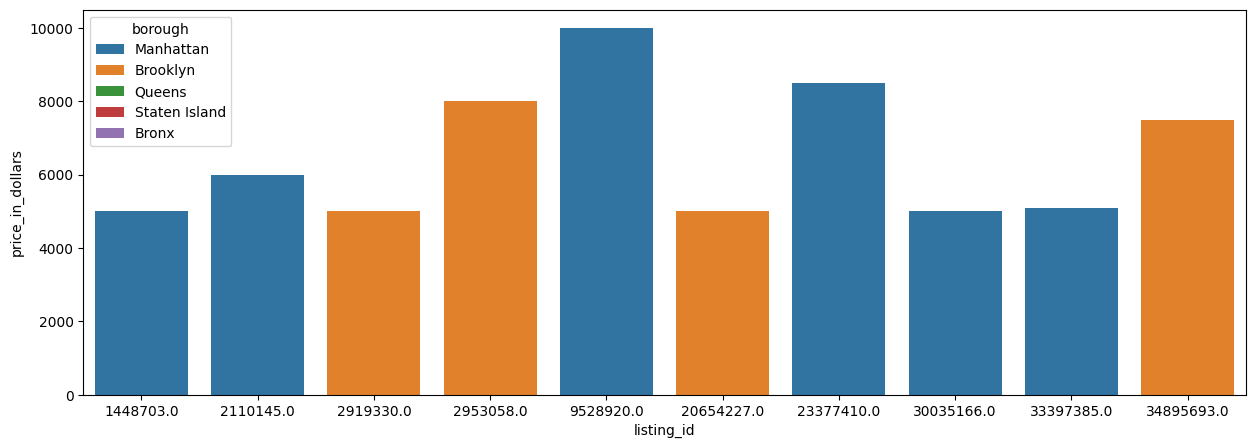

In [12]:
plt.figure(figsize=(15,5))
most_expensive = data.query('price_in_dollars>= 5000')
sns.barplot(x=most_expensive['listing_id'], y=most_expensive['price_in_dollars'], hue=data['borough'])
#These are the most expensive airbnbs in new york 

<Axes: ylabel='price_in_dollars'>

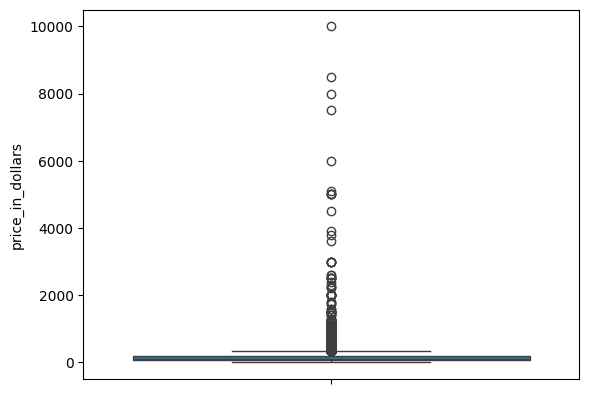

In [13]:
sns.boxplot(data['price_in_dollars'])

In [14]:
Q1 = data['price_in_dollars'].quantile(0.25)
Q3 = data['price_in_dollars'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

upper_limit, lower_limit


(np.float64(334.0), np.float64(-90.0))

In [15]:
#Addressing outliers
data.drop(data[(data['price_in_dollars'] < lower_limit) | (data['price_in_dollars'] > upper_limit)].index,inplace=True)

<Axes: ylabel='price_in_dollars'>

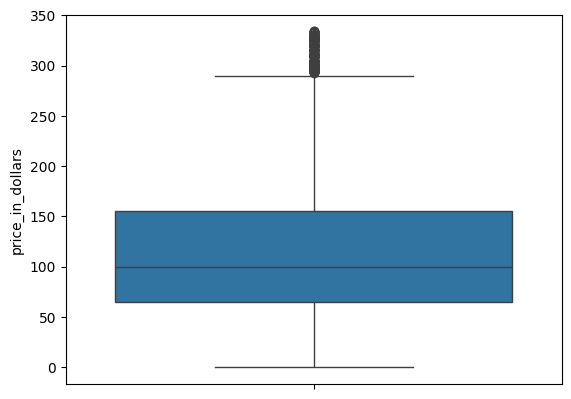

In [16]:
sns.boxplot(data['price_in_dollars'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30826 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   listing_id            30826 non-null  int64         
 1   listing_name          30826 non-null  object        
 2   host_id               30826 non-null  int64         
 3   host_name             30826 non-null  object        
 4   borough               30826 non-null  object        
 5   area                  30826 non-null  object        
 6   latitude              30826 non-null  float64       
 7   longitude             30826 non-null  float64       
 8   room_type             30826 non-null  object        
 9   price_in_dollars      30826 non-null  int64         
 10  minimum_stay          30826 non-null  int64         
 11  no_of_reviews         30826 non-null  int64         
 12  last_review_date      30826 non-null  datetime64[ns]
 13  reviews_per_month    

In [18]:
data[['listing_name', 'latitude', 'longitude']].duplicated().value_counts()
#Double checking for duplicates

False    30826
Name: count, dtype: int64

In [19]:
data.reset_index(drop=True, inplace=True)

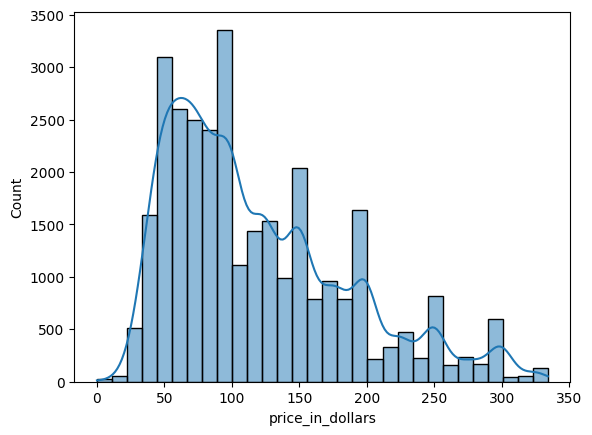

In [20]:
sns.histplot(data['price_in_dollars'], bins=30, kde=True)
plt.show()
#We can conclude from the histogram that most airbnbs in newyork rent for 50-100 usd

In [59]:
data['booking_availability'].value_counts()

booking_availability
0      6279
365     735
1       358
5       280
3       270
       ... 
183      23
214      22
181      19
202      19
196      19
Name: count, Length: 366, dtype: int64

<Axes: xlabel='booking_availability', ylabel='Count'>

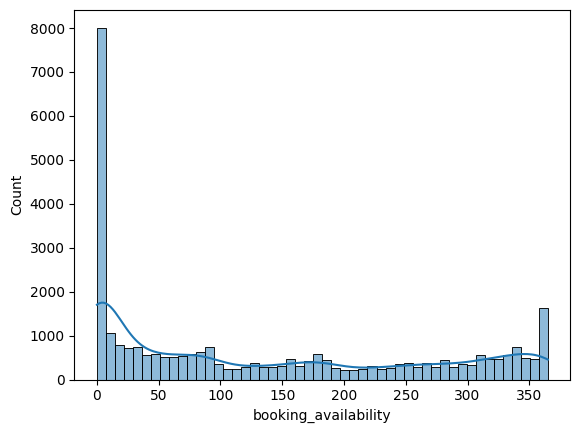

In [21]:
sns.histplot(data['booking_availability'],bins=50, kde=True)
#Most airbnbs are have fully booked or on long term lease 

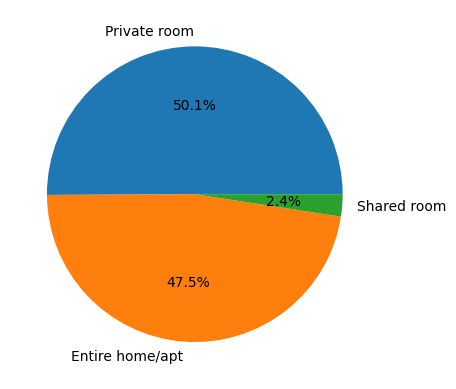

In [22]:
plt.pie(data['room_type'].value_counts(), labels=data['room_type'].unique(),  autopct='%1.1f%%')
plt.show()
#The frequency of Shared rooms airbnbs is very less compared to private rooms and Entire house airbnb listing which are almost equal 

In [23]:
data['borough'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [24]:
Boro_data = pd.DataFrame(zip(data['borough'].unique(),[data.query('borough == "Brooklyn"')['price_in_dollars'].mean(),
                                         data.query('borough == "Manhattan"')['price_in_dollars'].mean(),
                                         data.query('borough == "Queens"')['price_in_dollars'].mean(),
                                         data.query('borough == "Staten Island"')['price_in_dollars'].mean(),
                                         data.query('borough == "Bronx"')['price_in_dollars'].mean()]) )
Boro_data = Boro_data.rename(columns={
    1 : 'avg_price',
    0 : 'borough'
})
Boro_data

,borough,avg_price
0,Brooklyn,107.916250
1,Manhattan,144.557695
2,Queens,88.122252
3,Staten Island,86.702614
4,Bronx,75.166466


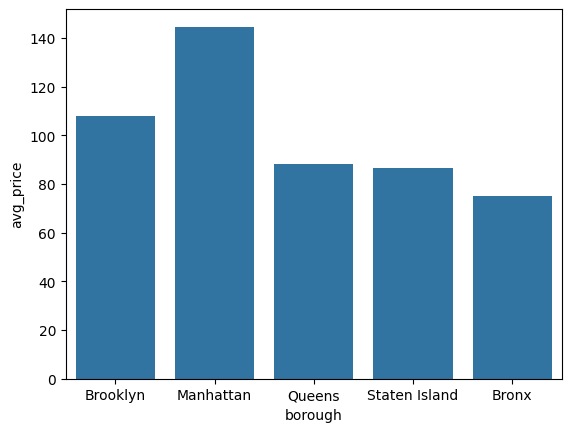

In [25]:
sns.barplot(x = Boro_data['borough'], y=Boro_data['avg_price'])
plt.show()
#avg price distribution across the 4 boroughs tells us that on avg Manhattan has the most expensive airbnbs on average and bronx the lowest

In [26]:
Room_data = pd.DataFrame(zip(data['room_type'].unique(),[data.query('room_type == "Private room"')['price_in_dollars'].mean(),
                                         data.query('room_type == "Entire home/apt"')['price_in_dollars'].mean(),
                                         data.query('room_type == "Shared room"')['price_in_dollars'].mean()]) )
Room_data = Room_data.rename(columns={
    1 : 'avg_price',
    0 : 'room'
})
Room_data

,room,avg_price
0,Private room,78.270100
1,Entire home/apt,160.499352
2,Shared room,53.789052


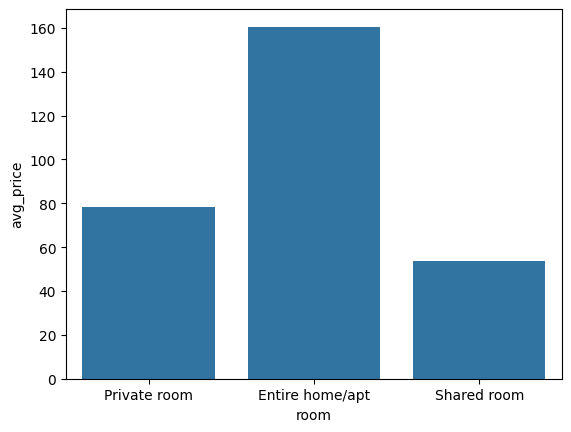

In [35]:
sns.barplot(x = Room_data['room'], y=Room_data['avg_price'])
plt.show()
#avg price distribution between shared and private is marginal compared to an entire house which is double(on average).

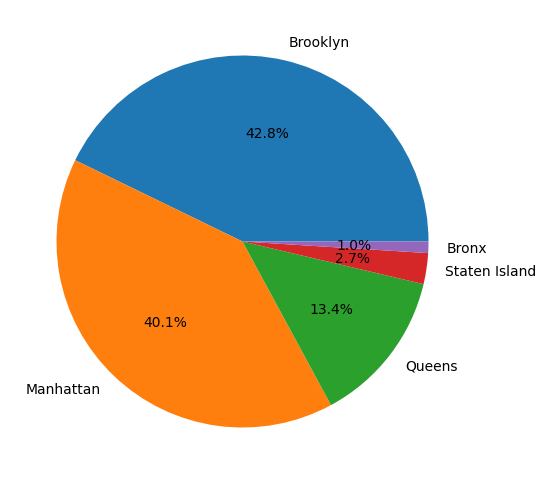

In [28]:
plt.figure(figsize=(6,10))
plt.pie(data['borough'].value_counts(), labels=data['borough'].unique(),  autopct='%1.1f%%')
plt.show()
#Distribution of airbnbs through the boroughs in new york

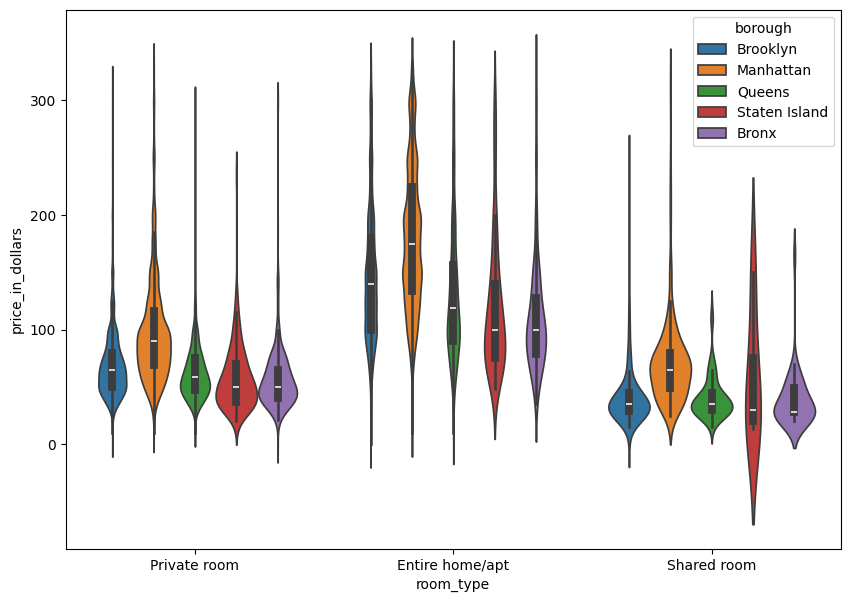

In [ ]:
plt.figure(figsize=(10,7))
sns.violinplot(x = data['room_type'], y=data['price_in_dollars'], hue=data['borough'])
plt.show()
#there is a uniform number of apartment in the range 100-200 usd in Manhattan which makes senses as on they both they are the most expensive on average   

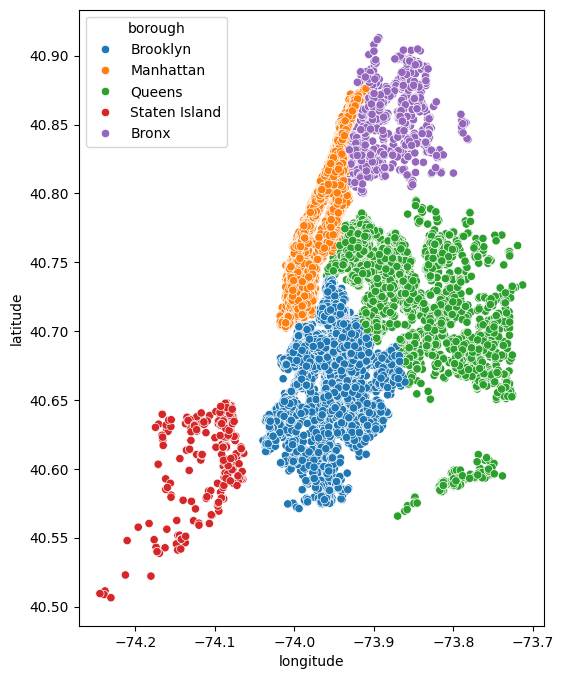

In [29]:
plt.figure(figsize=(6,8))
sns.scatterplot(y=data['latitude'], x= data['longitude'], hue=data['borough'])
plt.show()
#Distribution of airbnbs across new york

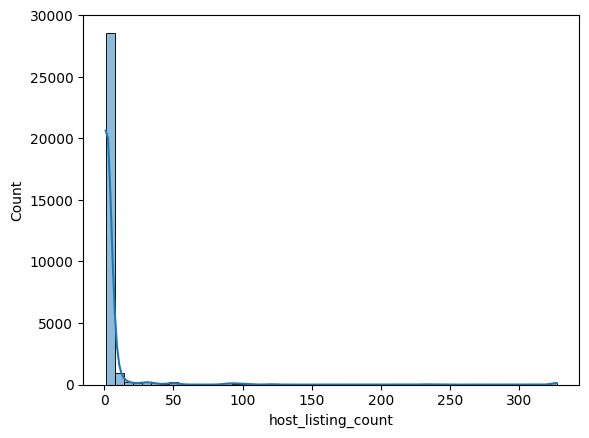

In [58]:
sns.histplot(data['host_listing_count'],bins=50, kde=True)
plt.show()

<Axes: >

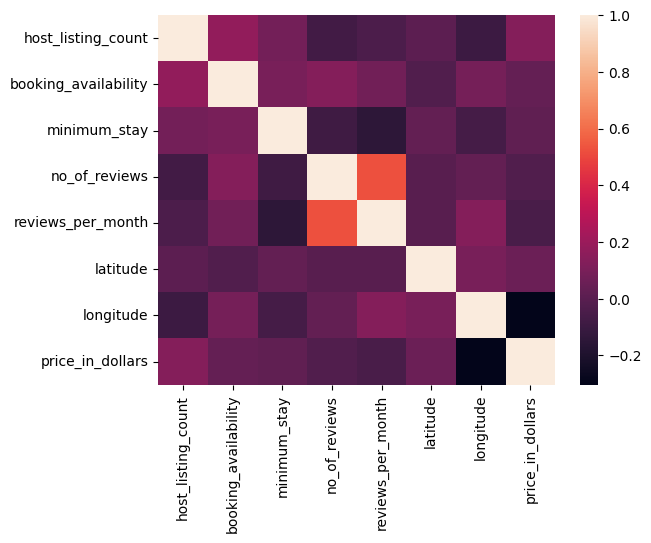

In [31]:
sns.heatmap(data[['host_listing_count','booking_availability','minimum_stay','no_of_reviews','reviews_per_month','latitude','longitude','price_in_dollars']].corr())